2024-04-05 23:58:34.305 | INFO     | FinMind.data.finmind_api:get_data:123 - download TaiwanStockInfo, data_id: 


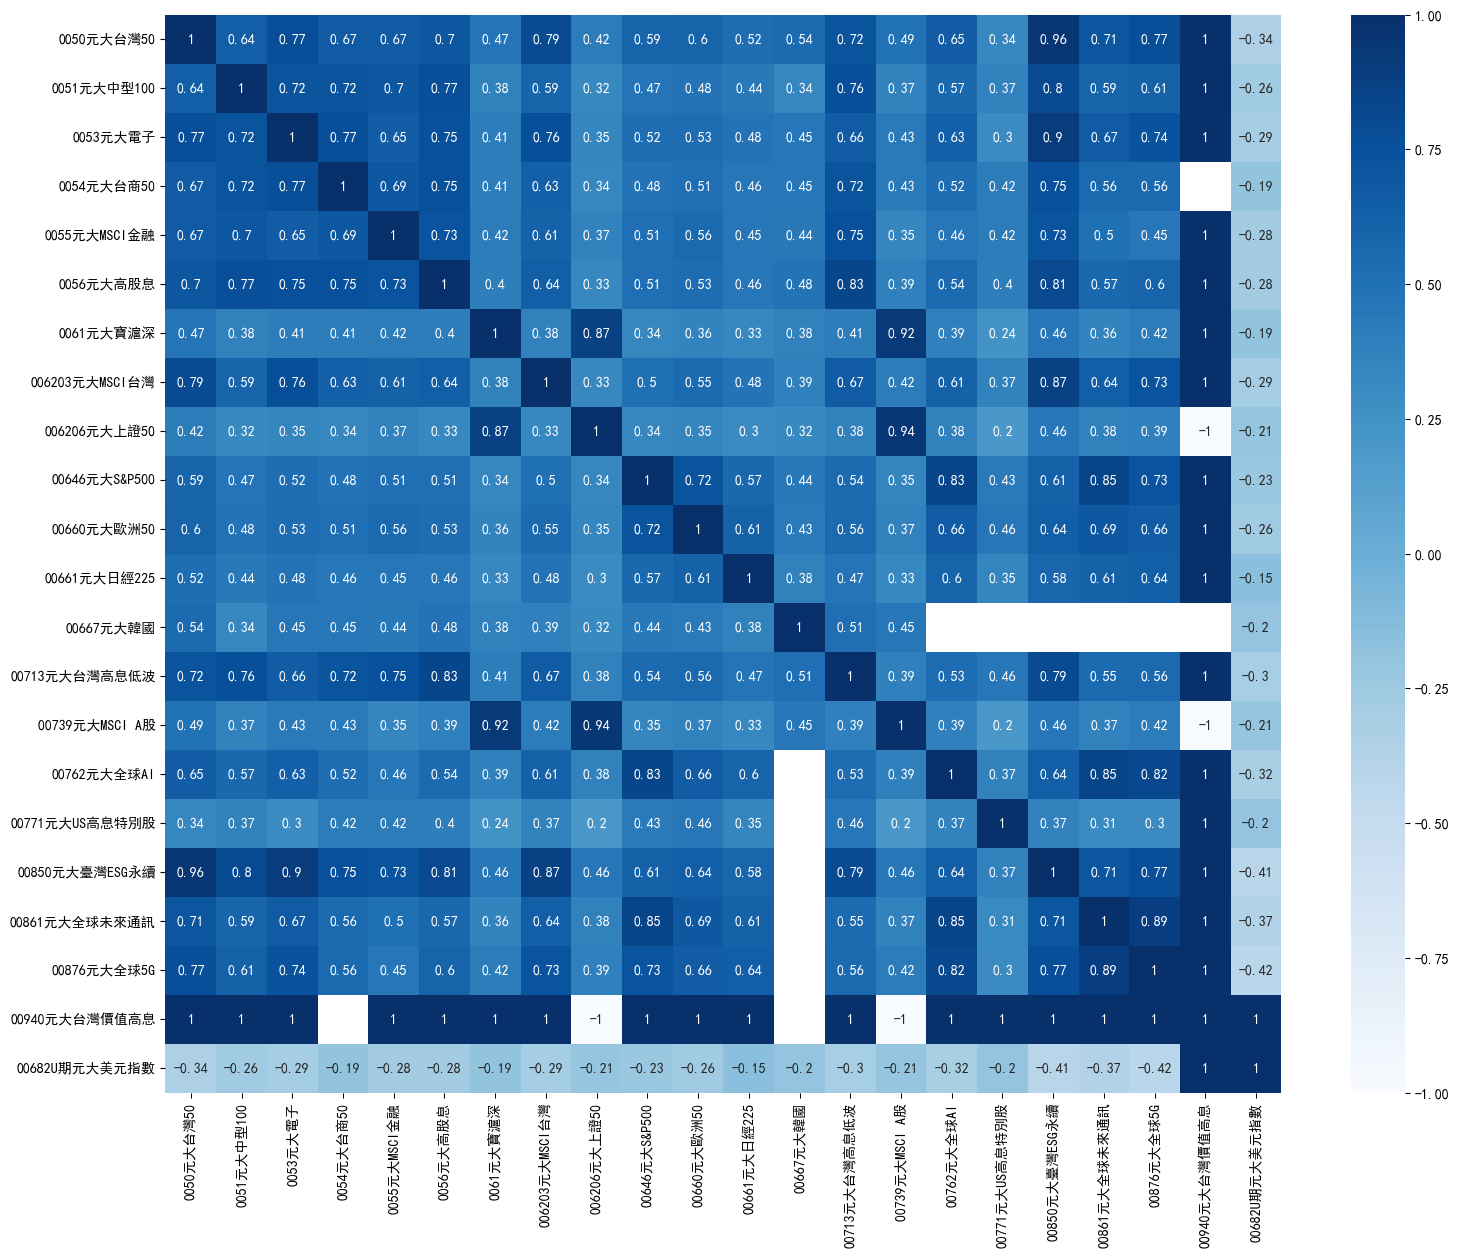

                0050    00682U
Date                          
2017-03-07  1.004158  1.000000
2017-03-08  1.005521  1.000000
2017-03-09  0.989019  1.000501
2017-03-10  0.999306  1.000000
2017-03-13  1.006944  1.000501
...              ...       ...
2024-03-28  0.995243  1.000000
2024-03-29  1.005736  1.000000
2024-04-01  0.997465  1.002375
2024-04-02  1.014295  1.004265
2024-04-03  0.993110  0.996697

[1724 rows x 2 columns]
商品:0050 權重:0.5
商品:00682U 權重:0.5
投資組合年化報酬:0.08401087615396485
投資組合風險:2.692796970401138e-05


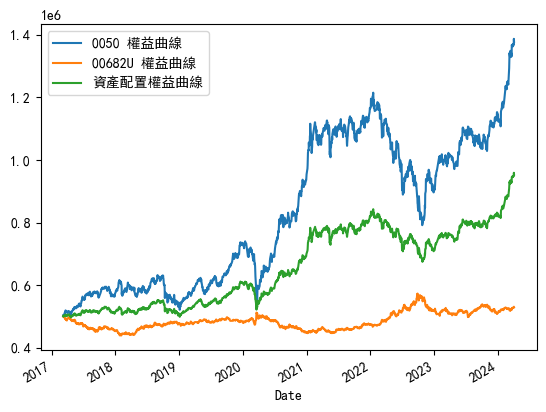

In [1]:
"""
台幣計價-美元股票資產配置
1. 分配資產配置比例
2. 取得相關資產資料
3. 資產配置風險報酬計算
4. 資產配置權益曲線圖
"""

from Data import getDataFM, getMultipleReturn
from FinancialMetrics import PortfolioRiskReturnRatio
import seaborn as sns
from FinMind.data import DataLoader
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
api = DataLoader()

# 取出台灣股市 美元指數 ETF
df = api.taiwan_stock_info()
USD_dataframe = df[
    (df["stock_id"].str[-1] == "U")
    & (df["stock_name"].str.contains("美元"))
    & (df["stock_name"].str.contains("元大"))
]
ETF_dataframe = df[
    (df["industry_category"].str[:3] == "ETF")
    & (df["stock_name"].str.contains("元大"))
    & (df["stock_id"].str[-1].str.isnumeric())
]

ETF_list = ETF_dataframe["stock_id"].to_list()
USD_list = USD_dataframe["stock_id"].to_list()

# 抓到所有歷史報酬率
ret_dataframe = getMultipleReturn(getDataFM, ETF_list + USD_list, "adj close")
# 將商品代碼換成商品名稱
ETF_name_list = (
    ETF_dataframe["stock_id"] + ETF_dataframe["stock_name"]
).to_list()
USD_name_list = (
    USD_dataframe["stock_id"] + USD_dataframe["stock_name"]
).to_list()
ret_dataframe.columns = ETF_name_list + USD_name_list

# 計算相關性
corr = round(ret_dataframe.corr(), 2)

# 並繪製熱力圖
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

# 股市 美元指數 資產配置比例
asset_allocation = {"0050": 0.50, "00682U": 0.50}

# 計算投資組合風險報酬
PortfolioRiskReturnRatio(getDataFM, asset_allocation, "adj close", 500000)
